In [1]:
!pip install numpy==1.23.1
!pip install pandas==1.4.3
!pip install matplotlib==3.3.2
!pip install seaborn==0.11.0

  Using cached numpy-1.23.1-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.23.1 which is incompatible.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.1 which is incompatible.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


  Using cached matplotlib-3.3.2.tar.gz (37.9 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for matplotlib
Failed to build matplotlib


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [571 lines of output]
  
  Edit setup.cfg to change the build options; suppress output with --quiet.
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.3.2]
        python: yes [3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit
                    (AMD64)]]
      platform: yes [win32]
   sample_data: yes [installing]
         tests: no  [skipping due to configuration]
        macosx: no  [Mac OS-X only]
  
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  copying lib\pylab.py -> build\lib.win-amd64-3.9
  creating build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\afm.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\animation.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\artist.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\axis.py -> build\li

  copying lib\matplotlib\tests\test_font_manager.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_gridspec.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_image.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_legend.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_lines.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_marker.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_mathtext.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_matplotlib.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_mlab.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_offsetbox.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_patches.py -> build\lib.win-amd64-3.9\matplotlib\te

  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.1
    Uninstalling numpy-1.23.1:
      Successfully uninstalled numpy-1.23.1


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.


# Importing importent libraries

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time 
import re

import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [3]:
data = pd.read_excel('dataset/news_share_data.xlsx')
data.head()

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,Business,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,Tech,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,Tech,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4,1,0,5.083665,9,Tech,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6,9,0,4.336022,7,00000,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000


In [4]:
df = data.copy()

In [5]:
df.shape

(1003, 22)

In [6]:
df.describe()

,article_id,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
count,1.003000e+03,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,6.915159e+06,0.526890,11.720837,5.188435,1.215354,4.603757,7.206381,1131.437972,6463.258234,3359.478830,13518.302031,0.446724,0.106187,0.038169,0.017772,0.292537,0.057536,4247.304088
std,4.823885e+05,0.118793,15.181597,8.495002,4.079730,0.701756,1.856713,1181.134621,7455.421154,1467.674637,51499.106509,0.109167,0.092496,0.015673,0.010557,0.325227,0.266609,22609.634435
min,2.195051e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3568.870000,1360.101000,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000,-1.000000,58.000000
25%,7.006102e+06,0.466751,4.000000,1.000000,0.000000,4.490363,6.000000,0.000000,3613.040000,2533.297000,1300.000000,0.395575,0.051911,0.028655,0.011224,0.000000,0.000000,1000.000000
50%,7.013065e+06,0.533118,8.000000,2.000000,0.000000,4.685484,7.000000,984.066700,4635.807000,3004.755000,2766.667000,0.455990,0.102579,0.037325,0.016266,0.200000,0.000000,1600.000000
75%,7.027570e+06,0.596615,14.000000,7.000000,1.000000,4.855388,9.000000,2116.714500,6561.910000,3809.005000,7341.000000,0.509508,0.163183,0.046922,0.022597,0.500000,0.150000,3100.000000
max,7.041291e+06,0.867925,162.000000,84.000000,51.000000,7.218430,10.000000,3613.040000,102200.000000,17604.270000,663600.000000,0.875000,0.489623,0.120805,0.103030,1.000000,1.000000,663600.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   article_id                  1003 non-null   int64         
 1   title                       1003 non-null   object        
 2   text                        1003 non-null   object        
 3   published_date              1003 non-null   datetime64[ns]
 4   unique_tokens_rate          1003 non-null   float64       
 5   num_hrefs                   1003 non-null   int64         
 6   num_imgs                    1003 non-null   int64         
 7   num_videos                  1003 non-null   int64         
 8   average_token_length        1003 non-null   float64       
 9   num_keywords                1003 non-null   int64         
 10  data_channel                1003 non-null   object        
 11  min_avg_key                 1003 non-null   float64     

###  There are no null values in this dataset

In [8]:
# Checking the time limit of the data
df["published_date"].min(), df["published_date"].max()

(Timestamp('2014-03-31 00:00:00'), Timestamp('2014-04-17 00:00:00'))

In [14]:
print ('Total dates in this dataset are:',df['published_date'].nunique())
df['published_date'].value_counts()

Total dates in this dataset are: 18


2014-04-03    83
2014-04-02    81
2014-04-08    78
2014-04-09    75
2014-04-16    72
2014-04-10    72
2014-04-15    70
2014-04-01    69
2014-04-07    65
2014-04-14    61
2014-04-04    59
2014-04-17    58
2014-04-11    53
2014-04-06    30
2014-04-13    29
2014-04-12    26
2014-04-05    21
2014-03-31     1
Name: published_date, dtype: int64

In [23]:
def print_unique_counts(dataframe, columns):
    unique_counts = dataframe[columns].nunique()
    for col, count in unique_counts.items():
        print(f"{col}: {count} unique values")
        print("\n")

columns_to_check = ['title','text','published_date',
                    'unique_tokens_rate', 'num_hrefs', 'num_imgs',
                    'num_videos', 'average_token_length','num_keywords','data_channel',
                    'min_avg_key','max_avg_key', 'avg_avg_key','href_avg_shares', 
                    'global_subjectivity','global_sentiment_polarity', 
                    'global_rate_positive_words','global_rate_negative_words', 
                    'title_subjectivity','title_sentiment_polarity','shares']


print_unique_counts(df, columns_to_check)


title: 1003 unique values


text: 1000 unique values


published_date: 18 unique values


unique_tokens_rate: 945 unique values


num_hrefs: 63 unique values


num_imgs: 42 unique values


num_videos: 23 unique values


average_token_length: 971 unique values


num_keywords: 9 unique values


data_channel: 6 unique values


min_avg_key: 467 unique values


max_avg_key: 559 unique values


avg_avg_key: 997 unique values


href_avg_shares: 517 unique values


global_subjectivity: 981 unique values


global_sentiment_polarity: 980 unique values


global_rate_positive_words: 870 unique values


global_rate_negative_words: 822 unique values


title_subjectivity: 109 unique values


title_sentiment_polarity: 131 unique values


shares: 324 unique values




In [24]:
df['num_keywords'].value_counts()

7     205
6     177
10    164
8     154
5     124
9     108
4      56
3      13
2       2
Name: num_keywords, dtype: int64

In [25]:
df['data_channel'].value_counts()

00000            350
Tech             198
Entertainment    185
Business         164
Social Media      55
Lifestyle         51
Name: data_channel, dtype: int64

### Oops!! There are actually a huge number of missing values in 'data_channel'. We will handle them later.

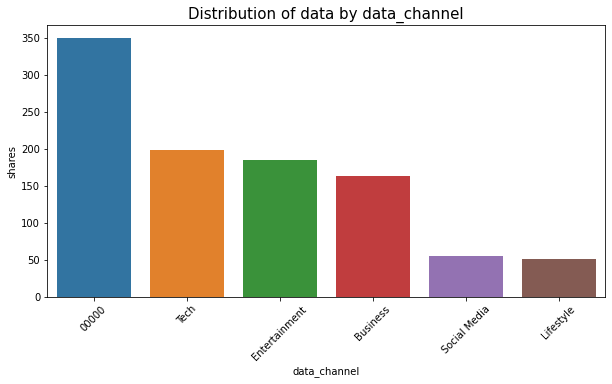

In [27]:
temp = df.groupby('data_channel')['shares'].count().reset_index().sort_values(by='shares',ascending=False)[:10]

plt.figure(figsize=(10,5))
sns.barplot(x=temp['data_channel'],y=temp['shares'])
plt.title("Distribution of data by data_channel",size=15)
plt.xticks(rotation=45)
plt.show()

# Handling the Outliers

In [28]:
# comparison with 95% quantile statistic

def describe_and_quantile_stats(df, columns):
    for col in columns:
        print(df[col].describe())
        print(f"95th percentile for '{col}': {df[col].quantile(0.95)}")
        print("-----------------------------\n")
        
columns_to_analyze = ['unique_tokens_rate', 'num_hrefs', 'num_imgs',
                    'num_videos', 'average_token_length','num_keywords',
                    'min_avg_key','max_avg_key', 'avg_avg_key','href_avg_shares', 
                    'global_subjectivity','global_sentiment_polarity', 
                    'global_rate_positive_words','global_rate_negative_words', 
                    'title_subjectivity','title_sentiment_polarity','shares']        
describe_and_quantile_stats(df, columns_to_analyze)

count    1003.000000
mean        0.526890
std         0.118793
min         0.000000
25%         0.466751
50%         0.533118
75%         0.596615
max         0.867925
Name: unique_tokens_rate, dtype: float64
95th percentile for 'unique_tokens_rate': 0.6877829
-----------------------------

count    1003.000000
mean       11.720837
std        15.181597
min         0.000000
25%         4.000000
50%         8.000000
75%        14.000000
max       162.000000
Name: num_hrefs, dtype: float64
95th percentile for 'num_hrefs': 33.0
-----------------------------

count    1003.000000
mean        5.188435
std         8.495002
min         0.000000
25%         1.000000
50%         2.000000
75%         7.000000
max        84.000000
Name: num_imgs, dtype: float64
95th percentile for 'num_imgs': 21.0
-----------------------------

count    1003.000000
mean        1.215354
std         4.079730
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        51.000000
Name

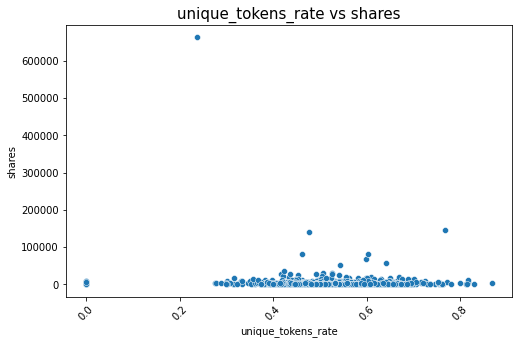

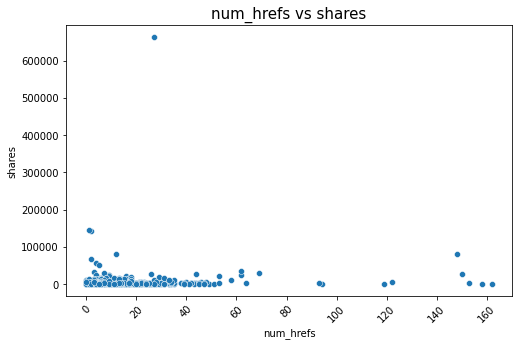

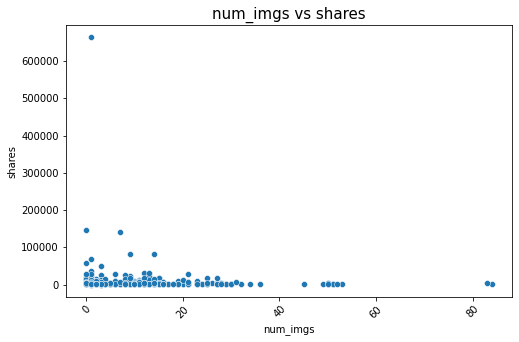

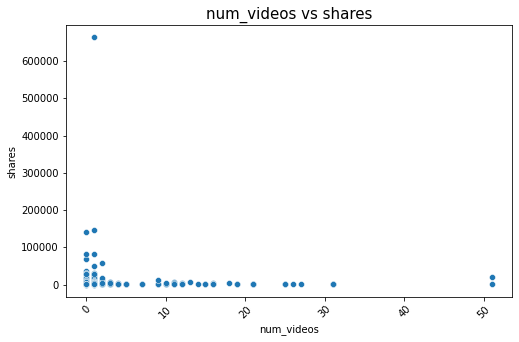

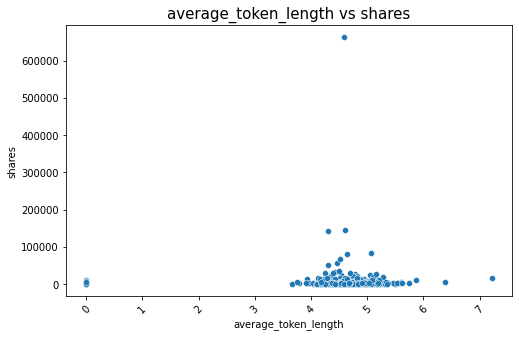

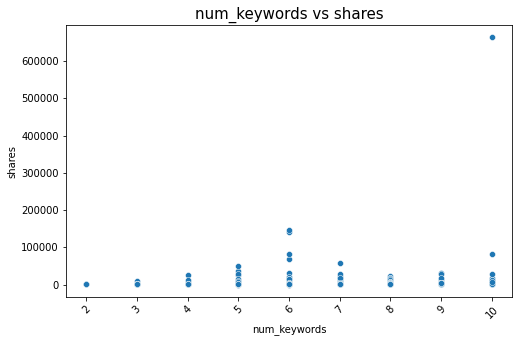

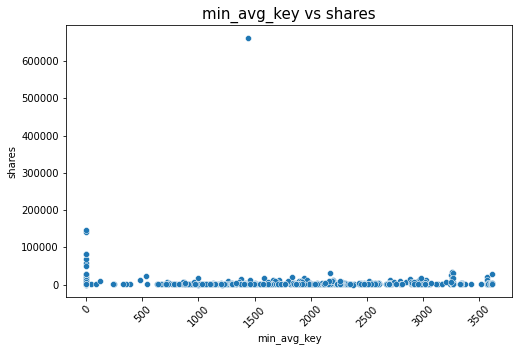

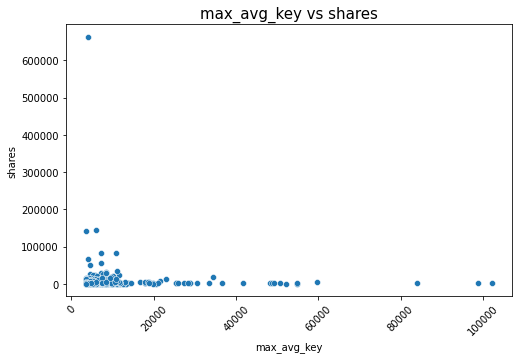

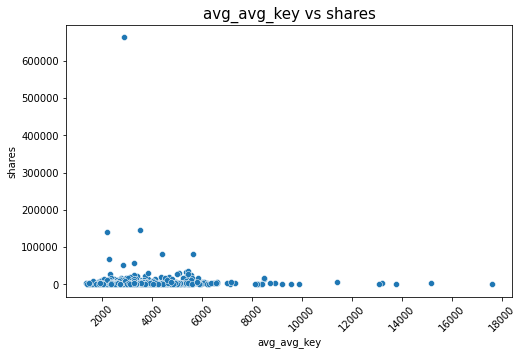

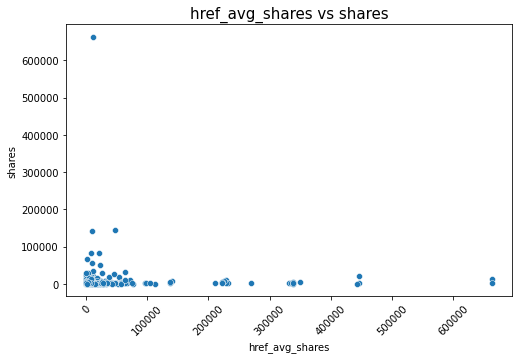

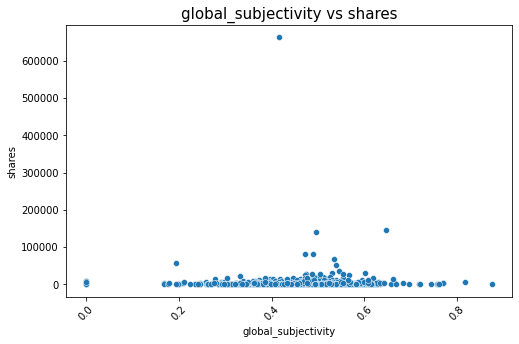

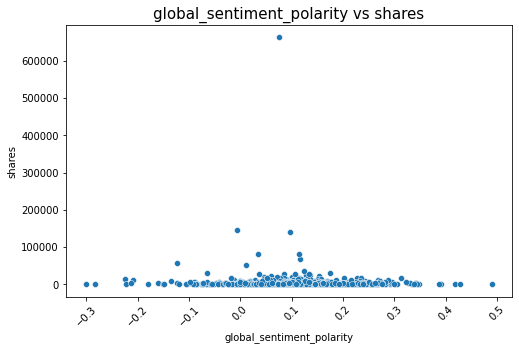

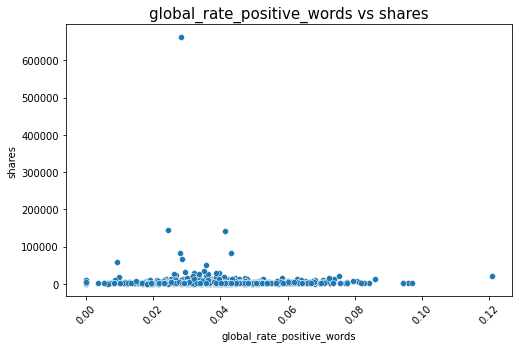

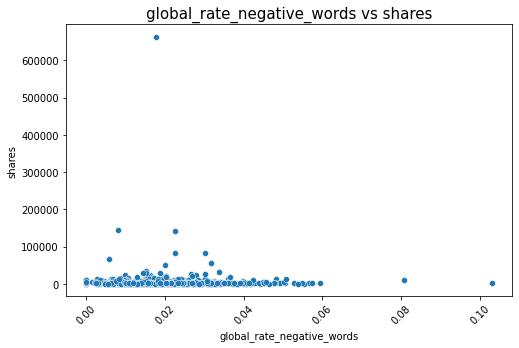

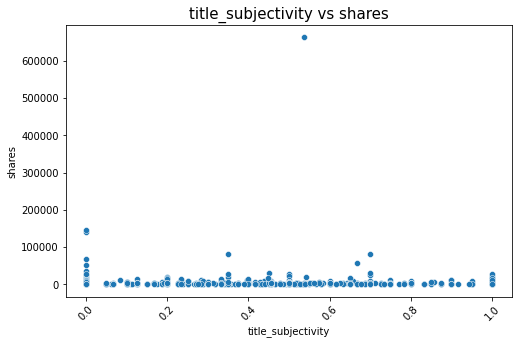

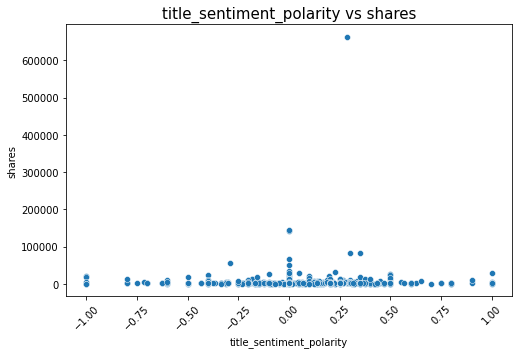

In [30]:
# plotting the coloms with respect to shares

def scatterplots_for_columns(df, columns):
    for col in columns:
        temp = df[[col, 'shares']]
        plt.figure(figsize=(8, 5))
        sns.scatterplot(temp[col], temp['shares'])
        plt.title(f"{col} vs shares", size=15)
        plt.xticks(rotation=45)
        plt.show()
        
columns_to_plot = ['unique_tokens_rate', 'num_hrefs', 'num_imgs',
                    'num_videos', 'average_token_length','num_keywords',
                    'min_avg_key','max_avg_key', 'avg_avg_key','href_avg_shares', 
                    'global_subjectivity','global_sentiment_polarity', 
                    'global_rate_positive_words','global_rate_negative_words', 
                    'title_subjectivity','title_sentiment_polarity'] 

scatterplots_for_columns(df, columns_to_plot)

### There are many outlires specially in 'shares' column.

In [31]:
# Outlier treatment for colomns with 98% quantile state

def clip_outliers(df, col):
    q_l = df[col].min()
    q_h = df[col].quantile(0.98)
    df = df[(df[col] >= q_l) & (df[col] <= q_h)]
    return df

# Create a copy of the original DataFrame without outliers
df1 = df.copy()

# Treating outliers in the numeric columns
cols_to_treat = ['shares','num_imgs','num_hrefs', 'num_videos',
                 'href_avg_shares', 'global_rate_positive_words',
                 'global_rate_negative_words','max_avg_key', 
                 'avg_avg_key']

for col in cols_to_treat:
    df1 = clip_outliers(df1, col)

df1.shape

(835, 22)

#### We clipped outliers with the 98th percentile instead of the 95th percentile because the latter was clipping too much data.

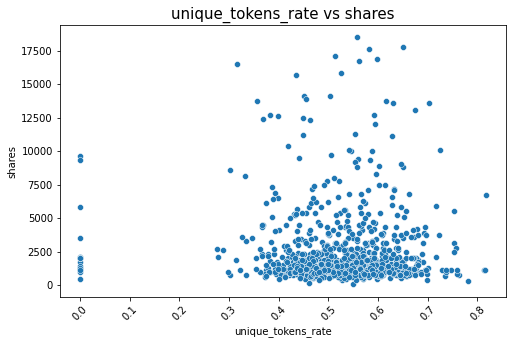

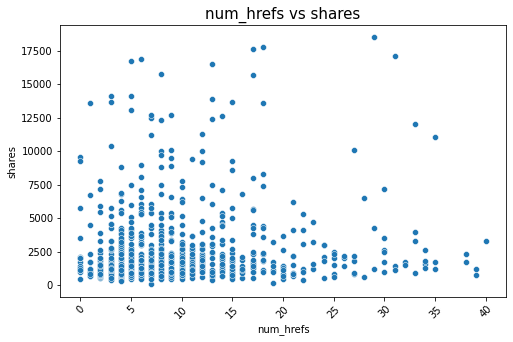

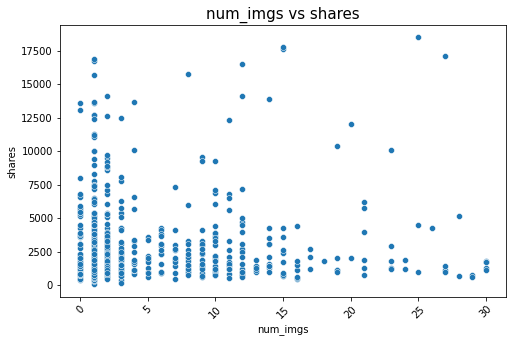

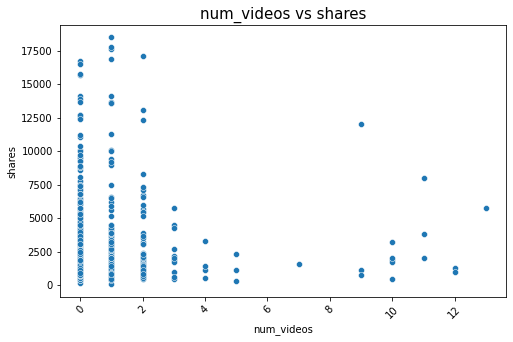

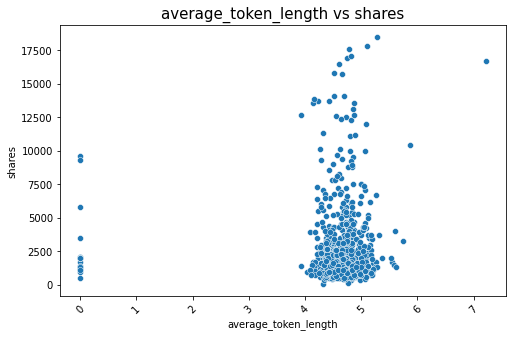

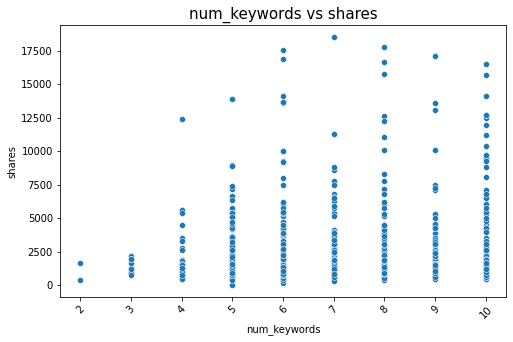

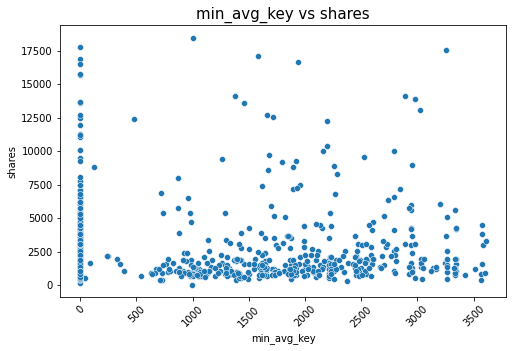

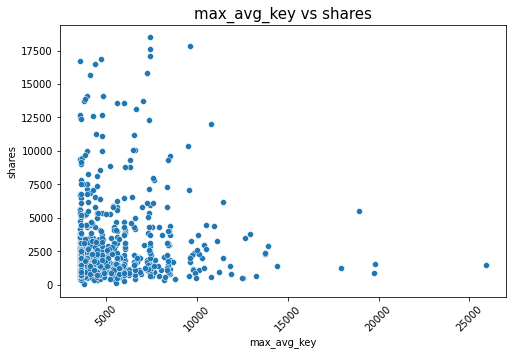

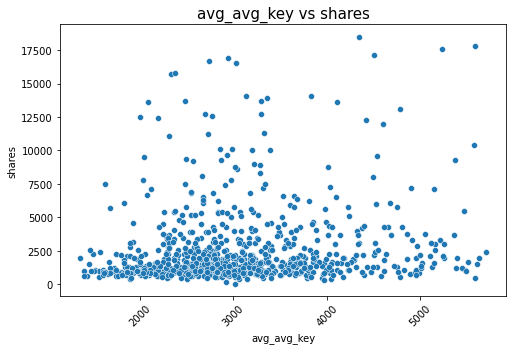

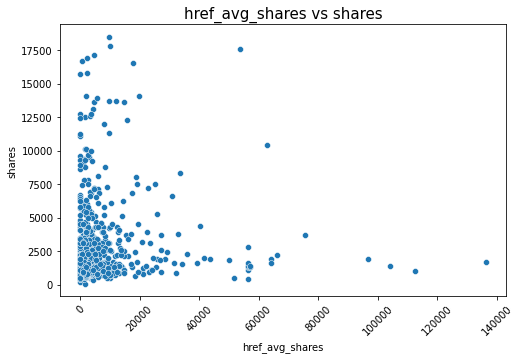

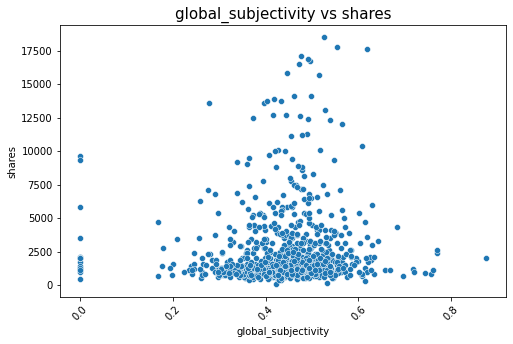

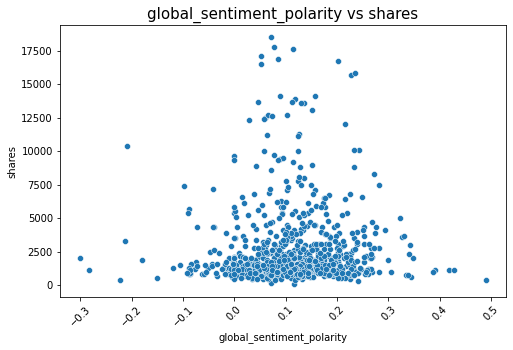

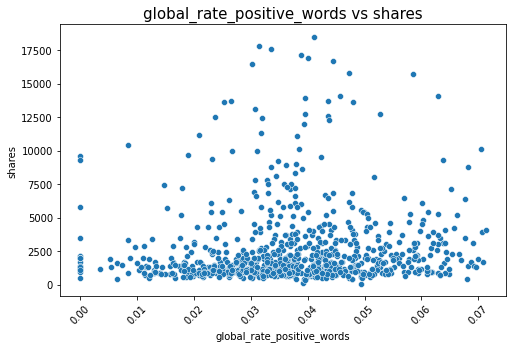

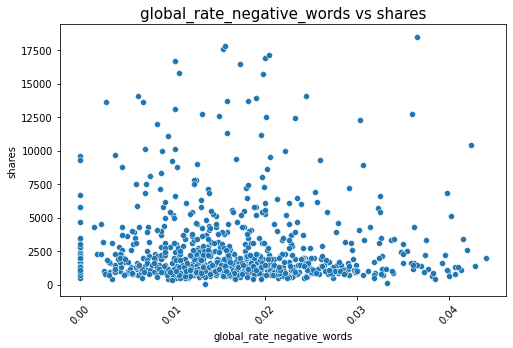

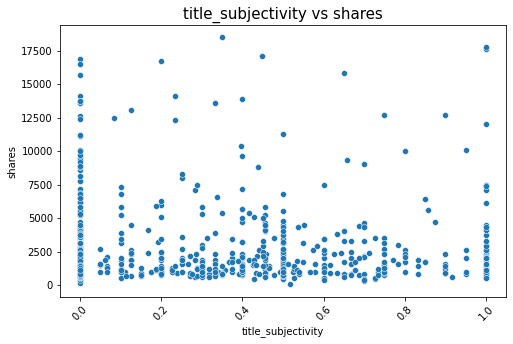

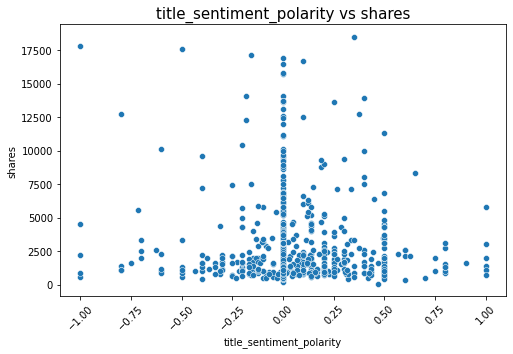

In [32]:
def scatterplots_for_columns(df1, columns):
    for col in columns:
        temp = df1[[col, 'shares']]
        plt.figure(figsize=(8, 5))
        sns.scatterplot(temp[col], temp['shares'])
        plt.title(f"{col} vs shares", size=15)
        plt.xticks(rotation=45)
        plt.show()
        
columns_to_plot = ['unique_tokens_rate', 'num_hrefs', 'num_imgs',
                    'num_videos', 'average_token_length','num_keywords',
                    'min_avg_key','max_avg_key', 'avg_avg_key','href_avg_shares', 
                    'global_subjectivity','global_sentiment_polarity', 
                    'global_rate_positive_words','global_rate_negative_words', 
                    'title_subjectivity','title_sentiment_polarity'] 

scatterplots_for_columns(df1, columns_to_plot)        


#### It seems like we couldn't get rid of all the outliers, so let's treat them manually.

In [33]:
df1 = df1[df1['average_token_length'] <= 6.5].copy()

In [34]:
df1 = df1[df1['max_avg_key'] <= 16000].copy()

In [35]:
df1 = df1[df1['href_avg_shares'] <= 70000].copy()

In [36]:
df1 = df1[df1['global_subjectivity'] <= 0.8].copy()

In [37]:
df1.shape

(823, 22)

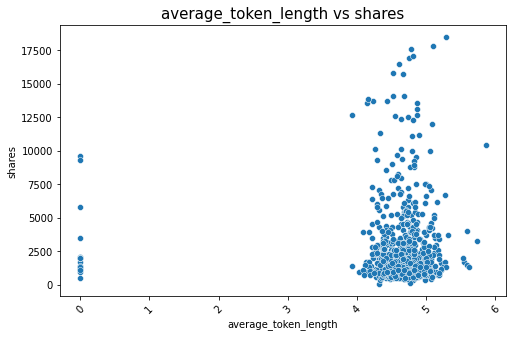

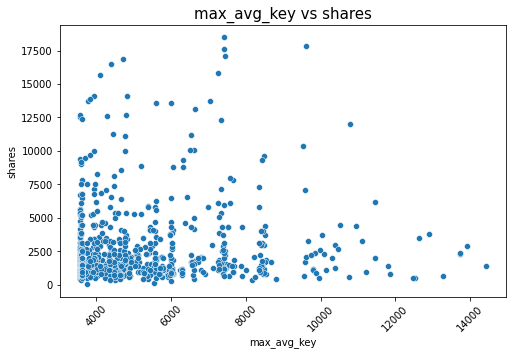

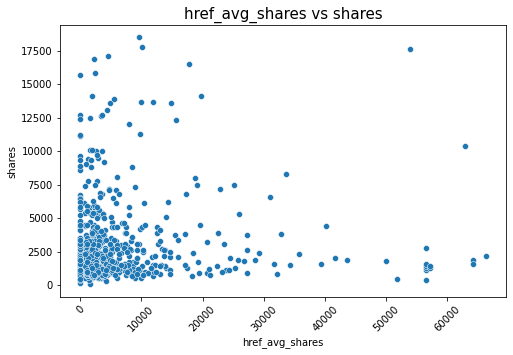

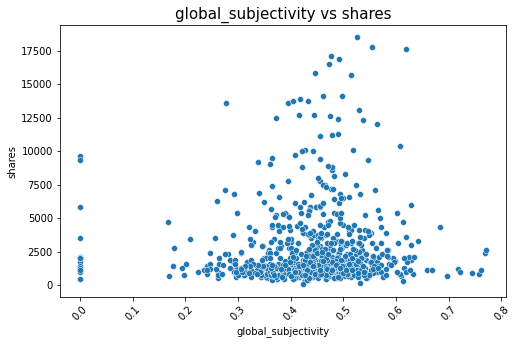

In [38]:
# Plotting to see without outlier data

def scatterplots_for_columns(df1, columns):
    for col in columns:
        temp = df1[[col, 'shares']]
        plt.figure(figsize=(8, 5))
        sns.scatterplot(temp[col], temp['shares'])
        plt.title(f"{col} vs shares", size=15)
        plt.xticks(rotation=45)
        plt.show()

columns_to_plot = ['average_token_length', 'max_avg_key', 'href_avg_shares','global_subjectivity']

scatterplots_for_columns(df1, columns_to_plot)

### Much better!!

In [39]:
# Saving the final dataframe without outlires as a csv file
df1.to_csv('dataset/News_Article_1.csv',index=False)